# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [2]:
df_aapl = yf.download('AAPL', start='2018-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426826,40.436216,39.722772,39.933990,102223600
2018-01-03,40.419788,40.964259,40.356426,40.490195,118071600
2018-01-04,40.607533,40.710794,40.384583,40.492536,89738400
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000
2018-01-08,40.917328,41.213030,40.818757,40.917328,82271200


## Generate Trading Signals

In [3]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703


In [4]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1


In [5]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
print(buy_markers, sell_markers)

Date
2018-10-16    1.0
2019-05-06    1.0
2022-09-26    1.0
2023-03-22    1.0
2024-06-13    1.0
Name: Signal, dtype: float64 Date
2018-12-21   -1.0
2022-06-03   -1.0
2022-10-07   -1.0
2024-03-14   -1.0
2025-04-07   -1.0
Name: Signal, dtype: float64


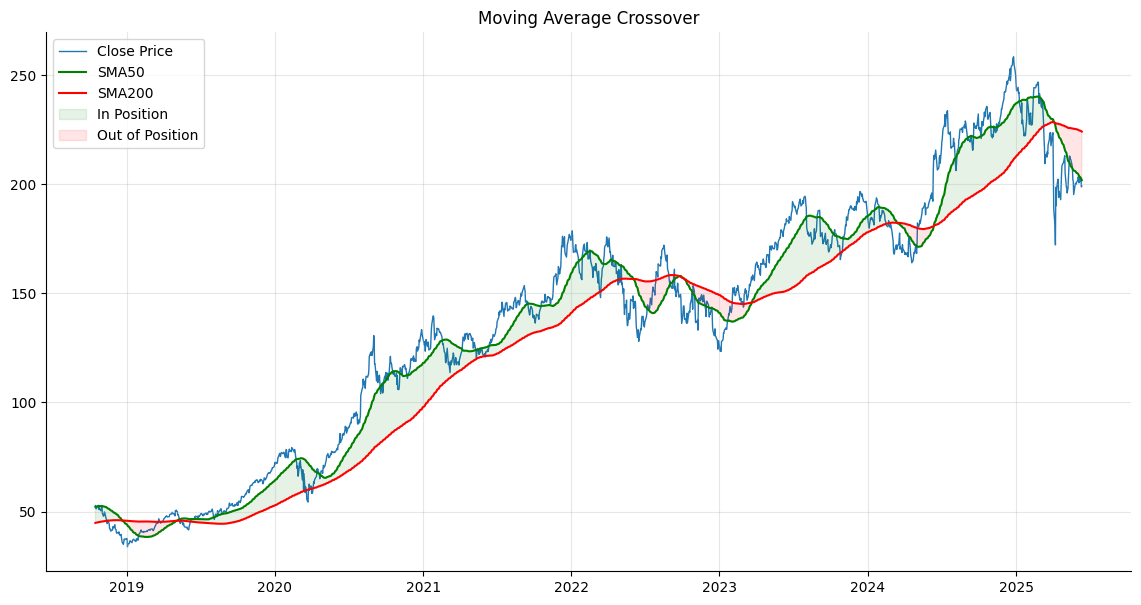

In [6]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                    color='Green',
                    alpha=0.1,
                    label="In Position")

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                    color='Red',
                    alpha=0.1,
                    label="Out of Position")          

ax.legend(loc='upper left')

plt.show;

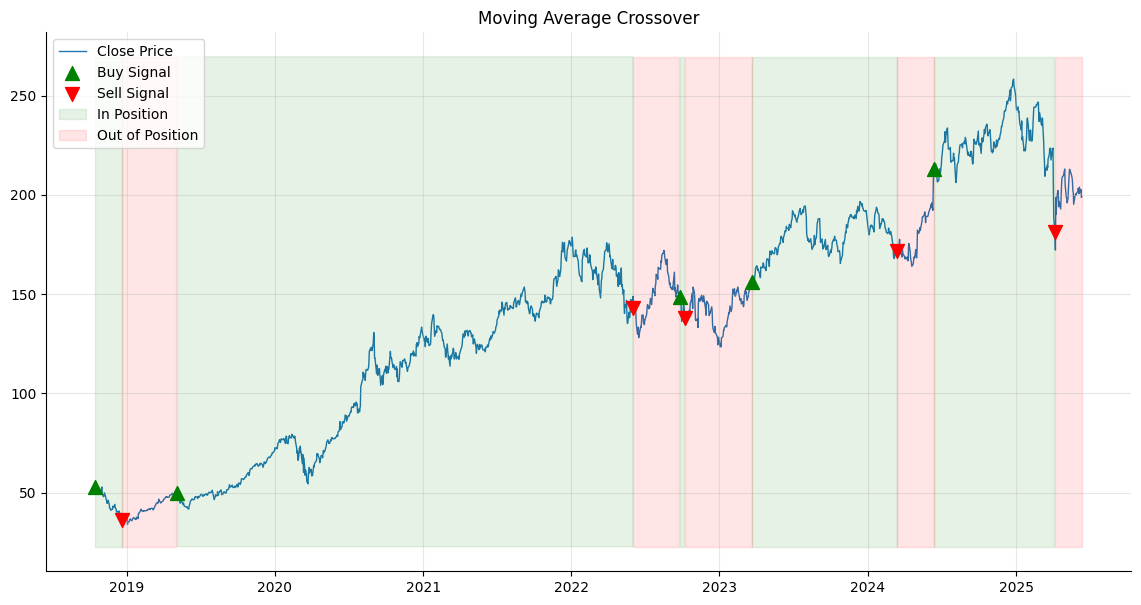

In [7]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

## Calculate Returns

In [8]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1,1.0
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0


In [9]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1,1.0,-0.023374
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1,1.0,0.006110
...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056


In [10]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1,1.0,-0.023374,-0.023374
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000


In [11]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1,1.0,-0.023374,-0.023374,0.972406
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000,3.866957
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000,3.820118
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000,3.843253


In [12]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679,0.995679
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254418,44.914902,1,1.0,-0.023374,-0.023374,0.972406,0.972406
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216,0.987216
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110,0.993248,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000,3.866957,1.699718
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000,3.820118,1.699718
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000,3.843253,1.699718


## Analysis of Strategy Performance

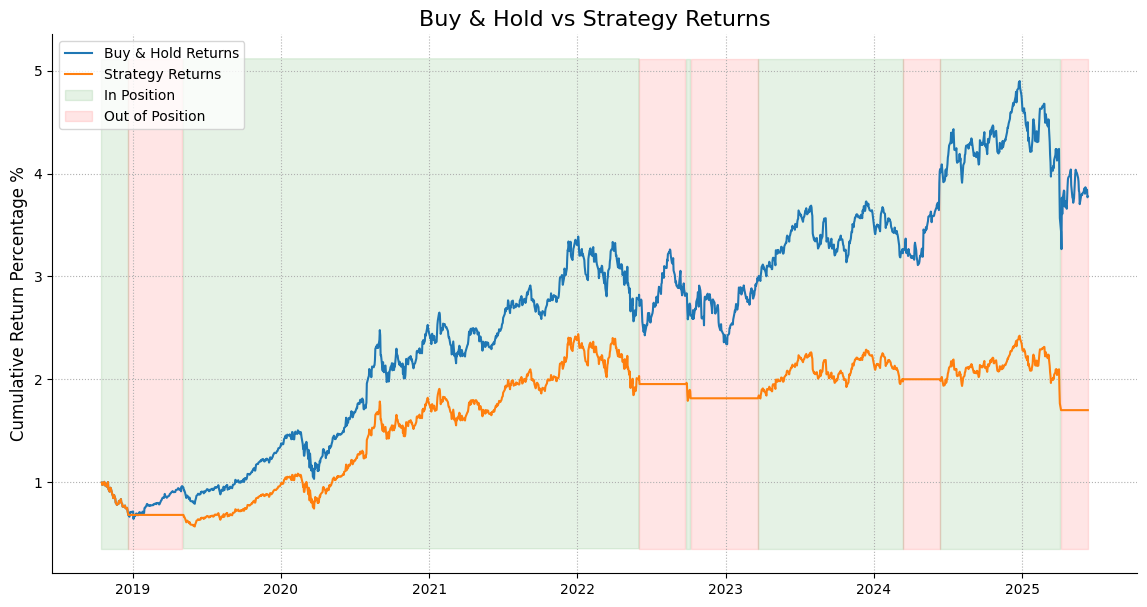

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

ax.legend(loc="upper left")

plt.show;

## Writing a function to backtest

In [17]:
def backtest_ma_strategy(ticker: str = None,
                         start_date: str = str(date.today().year - 5) + "-01-01",
                         end_date: str = str(date.today()),
                         short_window: int = 50,
                         long_window: int = 200,
):
    """
    Backtest a simple moving average trading strategy.
    """

    if ticker == None:
        print('Ticker Needed')
        return

    # Download Ticker Price Data
    df = yf.download(ticker, start=start_date, end=end_date).droplevel(axis=1, level=1)
    
    # Short Signal
    df['short_ma'] = df['Close'].rolling(window=short_window).mean()
    # Long Signal
    df['long_ma'] = df['Close'].rolling(window=long_window).mean()
    # Drop rows where signals are missing due to lack of data
    df.dropna(inplace=True)

    # When the short window closes above the long window, flag a buy signal
    df['signal'] = (df['short_ma'] > df['long_ma']) * 1
    # Position the days trade based on the previous close signal
    df['position'] = df['signal'].shift(1)

    # The daily price change of the stock
    df['daily_returns'] = df['Close'].pct_change()
    # The price change of the stock, only accounting for days we are in position
    df['strategy_returns'] = df['position'] * df['daily_returns']

    # The return on investment if we had bought and held from the start date
    df['daily_cum_returns'] = (1 + df['daily_returns']).cumprod()
    # The return on investment if we had traded and held the the stock signal
    df['strategy_cum_returns'] = (1 + df['strategy_returns']).cumprod()


    return df


In [73]:
backtest_ma_strategy("AAPL")

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858167,86.063326,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904274,118.368050,115.699772,118.105113,115393800,113.961830,86.279743,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943855,117.267619,112.632233,116.819662,120639300,114.056632,86.484888,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433784,115.865304,112.602995,113.158073,124423700,114.149778,86.694618,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810524,115.602352,113.401513,113.615755,89946000,114.295754,86.902936,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000,1.734751,1.059176
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000,1.713738,1.059176
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.390999,0,0.0,0.006056,0.000000,1.724117,1.059176


[*********************100%***********************]  1 of 1 completed


np.float64(0.15488149796250936)

In [36]:
annual_return = mean_daily_return * trading_days
annual_return

np.float64(0.20769880893072507)

In [126]:
(1 + backtest_ma_strategy("AAPL").loc['2020-10-16': '2021-10-16']['daily_returns']).mean() ** 252

[*********************100%***********************]  1 of 1 completed


np.float64(1.2513580734790113)

## Risk / Return

In [17]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Price,,
Daily_Ret,0.001000,0.020262
Strategy_Ret,0.000469,0.017378


In [18]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

,Return,Risk
Price,,
Daily_Ret,0.252031,0.321651
Strategy_Ret,0.118125,0.275865


## Sharpe Ratio

In [19]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
risk_free_return = 0.017

In [20]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]
ann_summary

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.252031,0.321651,0.730701
Strategy_Ret,0.118125,0.275865,0.366575


* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

## Backtesting through rolling windows

In [87]:
# We are creating windows in time of 1 year moving along month by month
window_size=252
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    windows.append(df_aapl[i:i+window_size])

In [88]:
windows[10]

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2019-08-19,50.707737,51.281466,50.630595,50.772822,97654400,48.538255,44.425743,1,1.0,0.018644,0.018644,0.961576,0.692246
2019-08-20,50.710140,51.430922,50.700499,50.835494,107537200,48.627491,44.419529,1,1.0,0.000047,0.000047,0.961622,0.692279
2019-08-21,51.259769,51.503242,51.009065,51.344143,86141600,48.717009,44.412075,1,1.0,0.010839,0.010839,0.972044,0.699782
2019-08-22,51.216389,51.693694,50.804168,51.392364,89014800,48.808638,44.421899,1,1.0,-0.000846,-0.000846,0.971222,0.699190
2019-08-23,48.849125,51.117534,48.453781,50.485945,187272000,48.853113,44.426877,1,1.0,-0.046221,-0.046221,0.926331,0.666873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,106.511749,109.537898,106.251250,109.038818,187902400,91.380583,74.622565,1,1.0,-0.029740,-0.029740,2.019794,1.454064
2020-08-12,110.051598,110.309660,107.410105,107.604866,165598000,92.010072,74.875615,1,1.0,0.033234,0.033234,2.086920,1.502389
2020-08-13,111.999237,113.004709,110.945071,111.434419,210082000,92.669861,75.135427,1,1.0,0.017698,0.017698,2.123854,1.528978


<Axes: xlabel='Date'>

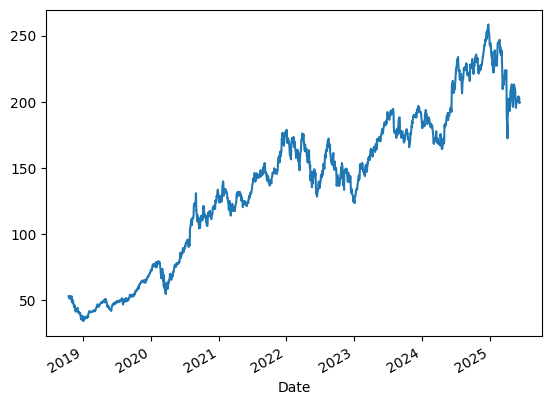

In [94]:
df_aapl['Close'].plot()

In [108]:
backtest_results = []

for window in windows:

    window_returns = backtest_ma_strategy(ticker = "AAPL",
                                          start_date = window.index[0],
                                          end_date = window.index[-1])[['daily_returns', 'strategy_returns']].dropna()
    
    daily_returns = window_returns['daily_returns']
    strategy_returns = window_returns['strategy_returns']
    
    backtest_results.append([window.index[0], window.index[-1], daily_returns.mean(), daily_returns.std(), strategy_returns.mean(), strategy_returns.std()])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [109]:
daily_returns.mean()

np.float64(-0.0017018861425391557)

0    2021-08-03 03:10:35.294117632
1    2022-08-02 19:03:31.764705792
2                         0.001234
3                         0.018699
4                         0.000863
5                         0.015444
dtype: object

In [118]:
df_aapl.loc['2018-10-16': '2019-10-16'].Daily_Ret.mean()

np.float64(0.00047422504086259206)

In [112]:
df_backtest = pd.DataFrame(backtest_results, columns=["Window Start", "Window End", "Daily Returns", "Daily Volatility", "Strategy Returns", "Strategy Volatility"])
# df_backtest.set_index("Window Start", inplace=True)
df_backtest

,Window Start,Window End,Daily Returns,Daily Volatility,Strategy Returns,Strategy Volatility
0,2018-10-16,2019-10-16,0.003039,0.018096,0.003039,0.018096
1,2018-11-14,2019-11-14,0.005076,0.012534,0.005076,0.012534
2,2018-12-17,2019-12-16,0.004611,0.011383,0.004611,0.011383
3,2019-01-17,2020-01-16,0.004525,0.010751,0.004525,0.010751
4,2019-02-19,2020-02-18,0.004217,0.014354,0.004217,0.014354
...,...,...,...,...,...,...
63,2024-01-22,2025-01-22,0.000162,0.013094,0.000162,0.013094
64,2024-02-21,2025-02-21,0.000373,0.015950,0.000373,0.015950
65,2024-03-21,2025-03-24,-0.002071,0.018564,-0.002071,0.018564
66,2024-04-22,2025-04-23,-0.002445,0.034382,-0.004632,0.022430


In [25]:
window

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2024-05-21,191.454636,191.832856,190.031284,190.200491,42309400,173.899904,179.519662,0,0.0,0.006857,0.0,3.630575,2.000044
2024-05-22,190.011368,191.922444,189.384311,191.375001,34648500,174.256330,179.584333,0,0.0,-0.007538,-0.0,3.603206,2.000044
2024-05-23,186.010101,190.110918,185.761265,190.091007,51005900,174.574478,179.624295,0,0.0,-0.021058,-0.0,3.527330,2.000044
2024-05-24,189.095657,189.692870,187.164685,187.941069,36294600,174.917162,179.687656,0,0.0,0.016588,0.0,3.585842,2.000044
2024-05-28,189.105606,192.101589,188.219750,190.618520,52280100,175.267600,179.752155,0,0.0,0.000053,0.0,3.586030,2.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,208.228509,225.689755,0,0.0,-0.000899,-0.0,4.006146,1.699719
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,207.628971,225.628424,0,0.0,-0.011739,-0.0,3.959118,1.699719
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,207.222529,225.576006,0,0.0,-0.009196,-0.0,3.922709,1.699719


In [ ]:
df_backtest.plot()

## Applying recency weighting to backtesting

In [ ]:
decay_rate = 0.95
weights = np.array([decay_rate**i for i in reversed(range(len(df_backtest)))])
weights

In [ ]:
df_backtest

In [ ]:
(df_backtest.mul(weights, axis=0) / np.sum(weights)).plot()

## Paramenter Optimization using a gridsearch